<a href="https://colab.research.google.com/github/daemonX10/GSTN/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [13]:
X = pd.read_csv('/content/X_Train_Data_Input.csv')
Y = pd.read_csv('/content/Y_Train_Data_Target.csv')

df = pd.concat([X, Y], axis=1)

In [14]:
df = df.drop(columns='ID', axis=1)

In [38]:
X_test = pd.read_csv('/content/X_Test_Data_Input.csv')
Y_test = pd.read_csv('/content/Y_Test_Data_Target.csv')
df_test = pd.concat([X_test,Y_test], axis=1)
df_test = df_test.drop(columns='ID', axis=1)

In [5]:
df.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,target
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,NaN,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,NaN,...,0,0.001351,0.00339,0.0,0,0.0,0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,...,1,0.001351,0.00339,0.0,0,0.0,0,0,0,0
3,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,...,0,NaN,0.00339,0.0,0,1.0,0,0,0,1
4,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,...,0,NaN,0.00339,0.0,0,0.0,0,0,0,0


In [39]:
df_test.isnull().sum()

,0
Column0,2
Column1,0
Column2,0
Column3,42234
Column4,42710
Column5,55659
Column6,1234
Column7,0
Column8,1234
Column9,243853


In [15]:
df.isnull().sum()

,0
Column0,9
Column1,0
Column2,0
Column3,126303
Column4,127710
Column5,167180
Column6,3850
Column7,0
Column8,3850
Column9,732137


<Axes: >

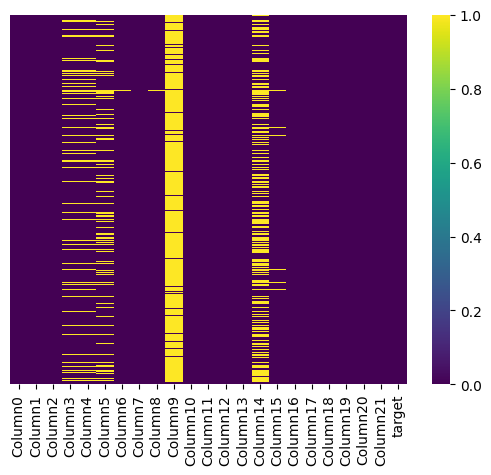

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [16]:
df = df.drop(columns=['Column9'],axis=1)

In [40]:
df_test = df_test.drop(columns=['Column9'],axis=1)

<Axes: >

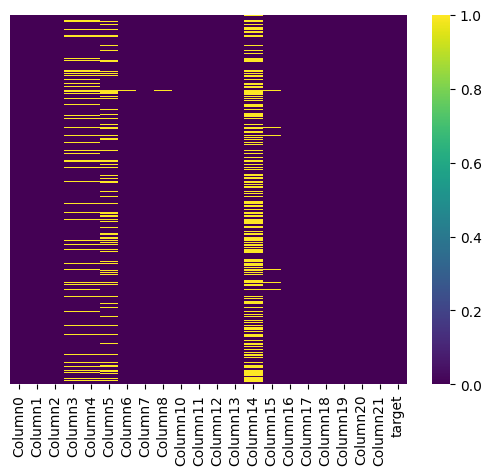

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [33]:
df['Column17'].value_counts()

,count
Column17,
0,766697
1,3297
2,1947
3,1472
4,1219
...,...
161,1
123,1
89,1


# data is imbalance and many nan value

In [29]:
columns = df.columns

In [30]:
for column in columns:
    print(column)
    print(df[column].unique())

Column0
[ 2.  0.  1.  5.  6.  7.  4.  8. 15.  3.  9. 11. 12. 14. 10. 13. 16. 17.
 18. nan]
Column1
[ 2495   211   718 ...   -58  -921 -1080]
Column2
[3726. 3454. 4543. ... 9399. 9871. 8955.]
Column3
[ 6.78139438e-01  4.52580144e-01 -1.57745350e+00             nan
 -2.02857209e+00 -1.12633491e+00 -4.04545172e-01  2.27020851e-01
  1.46155693e-03 -2.24097737e-01 -1.42708064e+00 -1.80301279e+00
 -1.35189420e+00 -1.53644272e+00 -6.75216324e-01  4.07468285e-01
 -4.49657030e-01  3.77393713e-01 -1.72782636e+00 -9.45887476e-01
  3.39800497e-01 -1.69023315e+00 -1.78250740e+00 -9.00775618e-01
  2.91466363e-01 -8.68552861e-01 -1.33874019e-01  4.32074754e-01
 -9.52067118e-02  1.36797133e-01 -1.29037803e+00  1.86010070e-01
 -3.36877384e-01 -1.48722978e+00 -1.64189901e+00 -7.98248666e-01
 -1.25522594e+00  7.66479881e-02 -1.01355526e+00 -1.21655863e+00
 -3.06119298e-01 -5.24843462e-01 -8.25589186e-01 -6.00546141e-02
 -4.81879787e-01 -1.75790093e+00 -5.52183982e-01 -1.04431335e+00]
Column4
[ 0.70140347

### **Column Summary with Suggested Handling:**

| **Column**  | **Type**             | **Imputation Strategy**                      |
|-------------|----------------------|----------------------------------------------|
| Column0     | Categorical           | Mode Imputation                              |
| Column1     | Numerical             | Median Imputation (or mean based on data)    |
| Column2     | Numerical             | Median Imputation (or mean based on data)    |
| Column3     | Numerical             | Median Imputation                            |
| Column4     | Numerical             | Median Imputation                            |
| Column5     | Numerical             | Mean/Median Imputation                       |
| Column6     | Numerical             | Mean/Median Imputation                       |
| Column7     | Numerical             | Mean/Median Imputation                       |
| Column8     | Numerical             | Mean/Median Imputation                       |
| Column10    | Binary                | Mode Imputation                              |
| Column11    | Binary                | Mode Imputation                              |
| Column12    | Binary                | Mode Imputation                              |
| Column13    | Binary                | Mode Imputation                              |
| Column14    | Numerical             | Mean/Median Imputation                       |
| Column15    | Numerical             | Mean/Median Imputation                       |
| Column16    | Ordinal/Discrete      | Median Imputation                            |
| Column17    | Discrete (high cardinality) | Mode or Group-based Imputation         |
| Column18    | Discrete              | Mode Imputation                              |
| Column19    | Binary                | Mode Imputation                              |
| Column20    | Binary                | Mode Imputation                              |
| Column21    | Binary                | Mode Imputation                              |
| Target      | Binary                | No Imputation (this is the target column)    |



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Assuming these columns are divided as per the previous discussion
numerical_columns = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column14', 'Column15']
binary_columns = ['Column10', 'Column11', 'Column12', 'Column13', 'Column19', 'Column20', 'Column21']
categorical_columns = ['Column0', 'Column16', 'Column17', 'Column18']

# --- Step 1: Fit on Training Data ---

# # Numerical Imputer
# num_imputer = SimpleImputer(strategy='median')  # or 'mean'
# num_imputer.fit(df_train[numerical_columns])  # Fit on training data

# Binary Imputer
bin_imputer = SimpleImputer(strategy='most_frequent')
bin_imputer.fit(df_train[binary_columns])  # Fit on training data

# Categorical Imputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_train[categorical_columns])  # Fit on training data

# Optionally, you can use KNN imputation for numerical columns if more accuracy is desired:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(df_train[numerical_columns])

# --- Step 2: Transform Training and Test Data ---

# Transform training data
df[numerical_columns] = knn_imputer.transform(df[numerical_columns])
df[binary_columns] = bin_imputer.transform(df[binary_columns])
df[categorical_columns] = cat_imputer.transform(df[categorical_columns])

# # Transform test data
df_test[numerical_columns] = knn_imputer.transform(df_test[numerical_columns])
df_test[binary_columns] = bin_imputer.transform(df_test[binary_columns])
df_test[categorical_columns] = cat_imputer.transform(df_test[categorical_columns])
